In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:
df = pd.read_excel('/kaggle/input/employee-turnover/Expanded_Workers_Turnover_Data_1000.xlsx')

In [3]:
# Take a peek
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Start time,Completion time,Email,Name,Last modified time,Gender,Age,Marital Status,Level of Education,...,Intent to LeaveI frequently think about leaving my current organization.,Intent to LeaveI have explored job opportunities outside my current organization.\n,Intent to LeaveI will likely leave this organization in the next 12 months if the opportunity arises.,Reasons for Potential TurnoverInadequate compensation is a major reason I would consider leaving.\n,Reasons for Potential TurnoverLack of career advancement opportunities is a major reason I would consider leaving.\n,Reasons for Potential TurnoverUnsatisfactory work environment or organizational culture is a major reason I would consider leaving.\n\n,Reasons for Potential TurnoverFamily responsibilities or relocation concerns significantly influence my decision to stay or leave.\n,External Factors The current economic situation in Nigeria affects my decision to stay or leave.,External Factors The availability of better job opportunities in the market would encourage me to change my job.\n,I have left an organization for similar reasons as stated above.
0,13,2025-01-06 11:43:18,2025-01-06 11:48:27,anonymous,NaN,NaN,Male,25 -34 years,Married,HND/BSc/Equivalent,...,5,5,2,1.0,5.0,5.0,1.0,1.0,5.0,Yes
1,49,2025-01-07 08:39:37,2025-01-07 08:45:37,anonymous,NaN,NaN,Male,25 -34 years,Single,HND/BSc/Equivalent,...,3,3,3,3.0,3.0,3.0,4.0,4.0,3.0,No
2,40,2025-01-06 21:55:05,2025-01-06 21:57:19,anonymous,NaN,NaN,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,...,3,2,4,3.0,4.0,5.0,3.0,2.0,5.0,Yes
3,32,2025-01-06 15:58:48,2025-01-06 16:10:24,anonymous,NaN,NaN,Male,Under 25 years,Single,HND/BSc/Equivalent,...,1,1,1,3.0,3.0,3.0,3.0,1.0,1.0,No
4,54,2025-01-07 09:48:06,2025-01-07 10:15:03,anonymous,NaN,NaN,Male,35 -44 years,Single,HND/BSc/Equivalent,...,4,4,4,5.0,5.0,1.0,5.0,5.0,5.0,No


In [4]:
len(df.columns)

40

In [5]:
df.shape

(1000, 40)

In [6]:
# columns we would be making use of
features = ['Gender','Age','Marital Status','Level of Education','Work Experience (in years)','Number of Previous Organisation worked for','Current Job Level']

In [7]:
# split the data into features (inputs) and targets (outputs)
y= df.pop('I have left an organization for similar reasons as stated above.')

df=df[features]
X = df

In [8]:
X.head()

,Gender,Age,Marital Status,Level of Education,Work Experience (in years),Number of Previous Organisation worked for,Current Job Level
0,Male,25 -34 years,Married,HND/BSc/Equivalent,4 -6 years,3,Senior staff (Levels 7 above)
1,Male,25 -34 years,Single,HND/BSc/Equivalent,1 -3 years,1,Senior staff (Levels 7 above)
2,Male,25 -34 years,Single,Senior Secondary School Certificate /Equivalent,1 -3 years,1,Junior staff (Levels 1 -6)
3,Male,Under 25 years,Single,HND/BSc/Equivalent,4 -6 years,1,Junior staff (Levels 1 -6)
4,Male,35 -44 years,Single,HND/BSc/Equivalent,4 -6 years,2,Junior staff (Levels 1 -6)


In [9]:
# get all the categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [10]:
# Encode categorical features ( convert text data to numerical)
encoder = OrdinalEncoder()
X[categorical_features] = encoder.fit_transform(X[categorical_features])

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# label transformed from categorical ('Yes','No') to (1,0)
y_encoded

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [12]:
corr_data = X.copy()
corr_data['target'] = y_encoded

<Axes: >

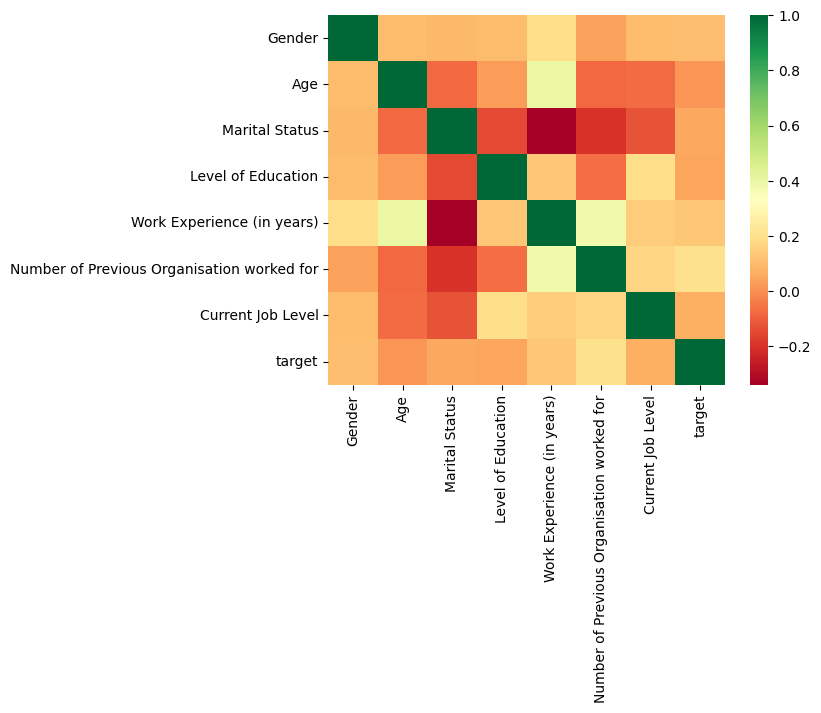

In [13]:
sns.heatmap(corr_data.corr(),cmap="RdYlGn")

### The heat map above shows the correlation of the columns including the target with each other. values closer to green are highly correlated while values closer to red have low correlation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
# install tabpfn
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 3.1 MB/s eta 0:00:00


In [17]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score

classifier = TabPFNClassifier(device='cpu')

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


In [21]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

In [22]:
# Function to plot classification report with support
def plot_classification_report_with_support(report):
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[label][metric] for metric in metrics] for label in labels])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report with Support')
    plt.show()

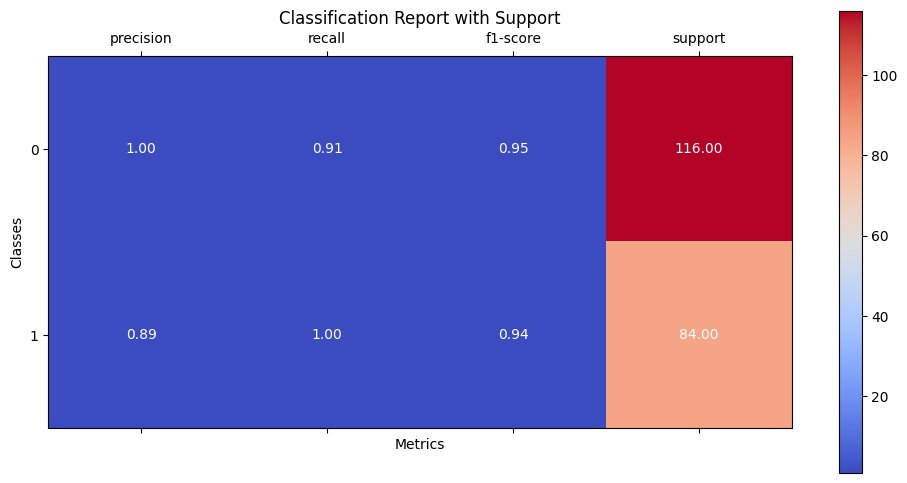

In [23]:
# Plotting the classification report with support
plot_classification_report_with_support(report)

In [24]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[ 84,   0],
       [ 10, 106]])

In [25]:
labels = ['Yes', 'No']

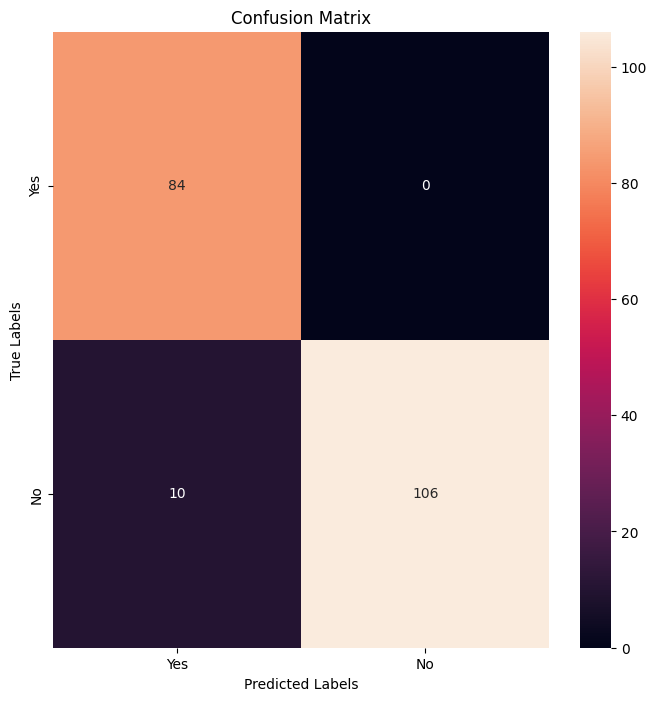

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d",  xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()